In [19]:
# !pip install tensorflow
# !pip install matplotlib

In [20]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [21]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

10 класів, 60.000 зображень, кожне 32х32 пікселі

In [22]:
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Також виділимо дані для валідації

In [23]:
val_images, val_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [24]:
train_images.shape

(45000, 32, 32, 3)

Створимо датасети TF

In [25]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

Приклад елементів:

2026-02-15 13:04:46.738318: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


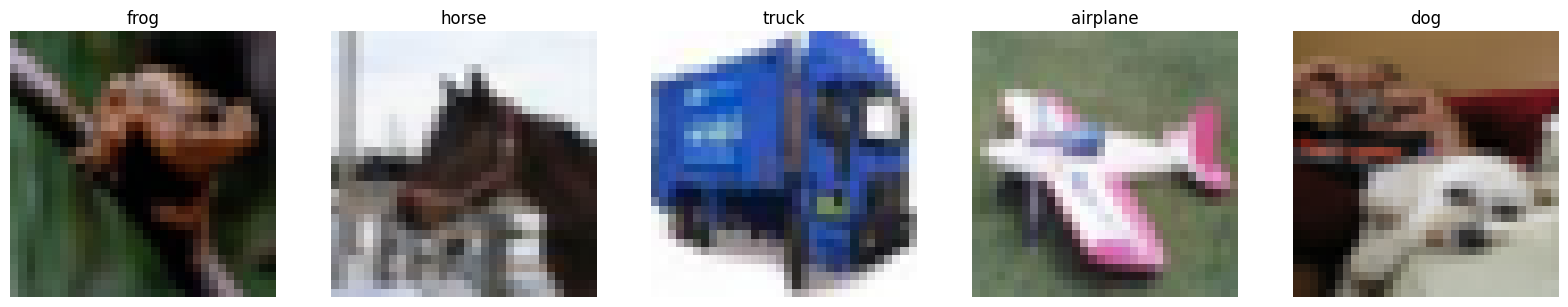

In [26]:
plt.figure(figsize=(20, 20))
for i, (image, label) in enumerate(train_dataset.take(5)):
    ax = plt.subplot(5, 5, i+1)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')
    plt.imshow(image)

Препроцесінг:

In [27]:
def preprocess_image(image, label):
    image = tf.image.per_image_standardization(image) #normalize
    image = tf.image.resize(image, (227, 227))
    return image, label

In [28]:
def preprocess_dataset(ds):
    return ds.map(preprocess_image).shuffle(ds.cardinality()).batch(batch_size=32, drop_remainder=True)

In [29]:
train_dataset = preprocess_dataset(train_dataset)
val_dataset = preprocess_dataset(val_dataset)
test_dataset = preprocess_dataset(test_dataset)